In [1]:
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# read CSV
csv_data  = pd.read_csv('../../../data/shibata/nict/sample.csv')

In [3]:
# csv_data = csv_data[csv_data.frame < 6800]
# csv_data.head()
csv_data.tail()

,frame,id,wx,wy,wz
25739580,1895701,282065,-154.848,-596.106,269.236
25739581,1895722,282066,-198.257,-704.077,319.259
25739582,1895724,282066,-218.182,-641.345,360.160
25739583,1895729,282066,-229.691,-637.625,348.923
25739584,1895734,282066,-228.300,NaN,NaN


In [4]:
import math

In [5]:
human = []
for i in range(1600):
    person = csv_data[csv_data.id == i]
    first = person.head(1)
    end = person.tail(1)
    dx = abs(float(first['wx']) - float(end['wx']))
    dz = abs(float(first['wz']) - float(end['wz']))
    second = abs(float(first['frame']) - float(end['frame']))/30
    if second != 0:
        v = math.sqrt(dx*dx + dz*dz)/second
        human.append(v)

/home/itolab/virtualenvs/dshiba-env/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


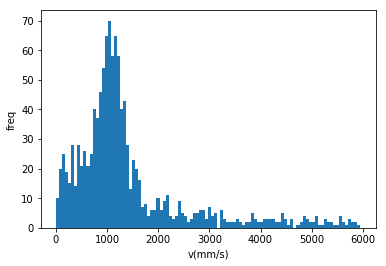

In [6]:
person = list(filter((lambda x: x < 6000), human))
person = list(filter((lambda x: x < 6000), human))
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(person, bins=100)
ax.set_xlabel('v(mm/s)')
ax.set_ylabel('freq')
fig.show()

In [7]:
import csv

f = open('some.csv', 'w')
writer = csv.writer(f, lineterminator='\n')
for word in person:
    writer.writerow([word])
f.close()

In [8]:
# fig = pyplot.figure()
# ax = Axes3D(fig)

# ax.set_xlabel("WX")
# ax.set_ylabel("WZ")
# ax.set_zlabel("Frame")

# d1 = csv_data['wx']
# d2 = csv_data['wz']
# d3 = csv_data['frame']
# i = csv_data['id']

# ax.scatter(d1, d2, d3, c=i, cmap=pyplot.get_cmap("tab10"))
# pyplot.show()